# Credit Card Fraud Detection: Capstone Project

### In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.¶
“Fraud detection is a set of activities that are taken to prevent money or property from being obtained through false pretenses.”

### Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  l

In [ ]:
print(train_data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

### Exploratory Data Analysis

In [ ]:
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
Unnamed: 0                       0
trans_date_trans_time            0
cc_num                           0
merchant                         0
category                         0
amt                              0
first                            0
last                             0
gender                           0
street                           0
city                             0
state                            0
zip                              0
lat                              0
long                             0
city_pop                         0
job                              0
dob                              0
trans_num                        0
unix_time                        0
merch_lat                        0
merch_long                       0
is_fraud                         0
trans_hour                       0
trans_day                        0
trans_date                       0
time_since_last_transaction    983
age                     

In [ ]:
print("\nTrain Data Summary Statistics:")
print(train_data.describe())


Train Data Summary Statistics:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01

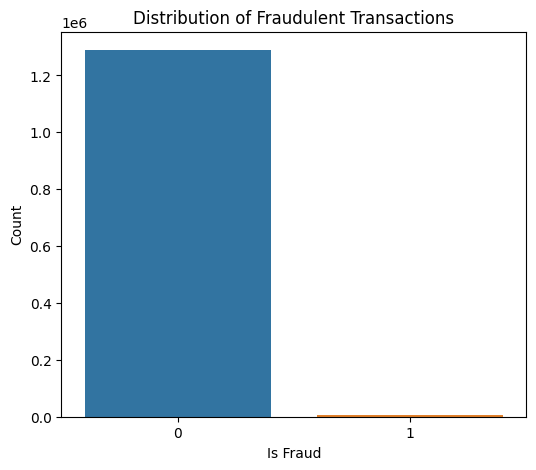

In [ ]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(6, 5))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

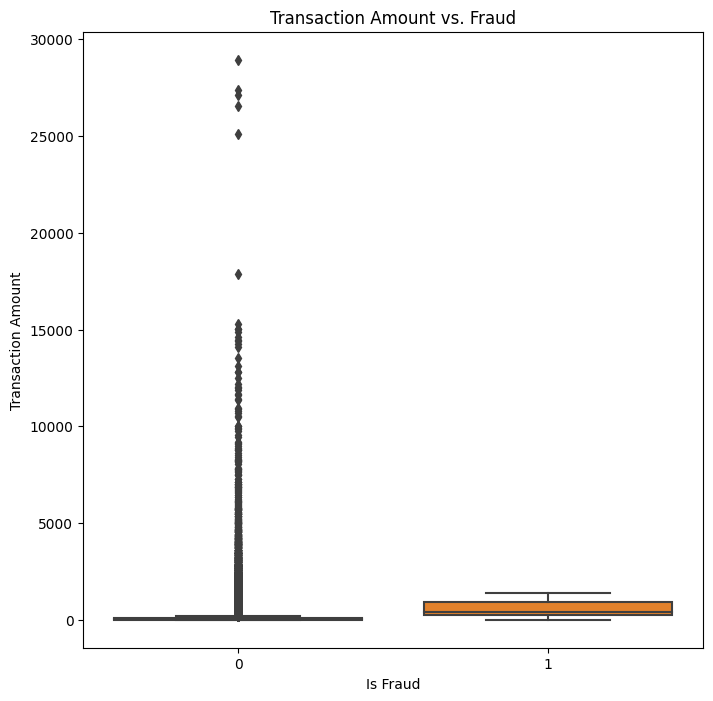

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

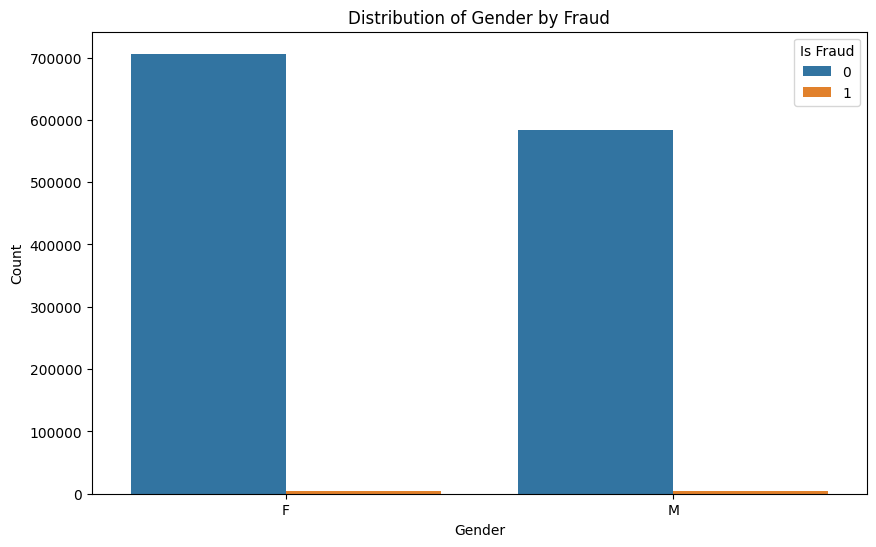

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

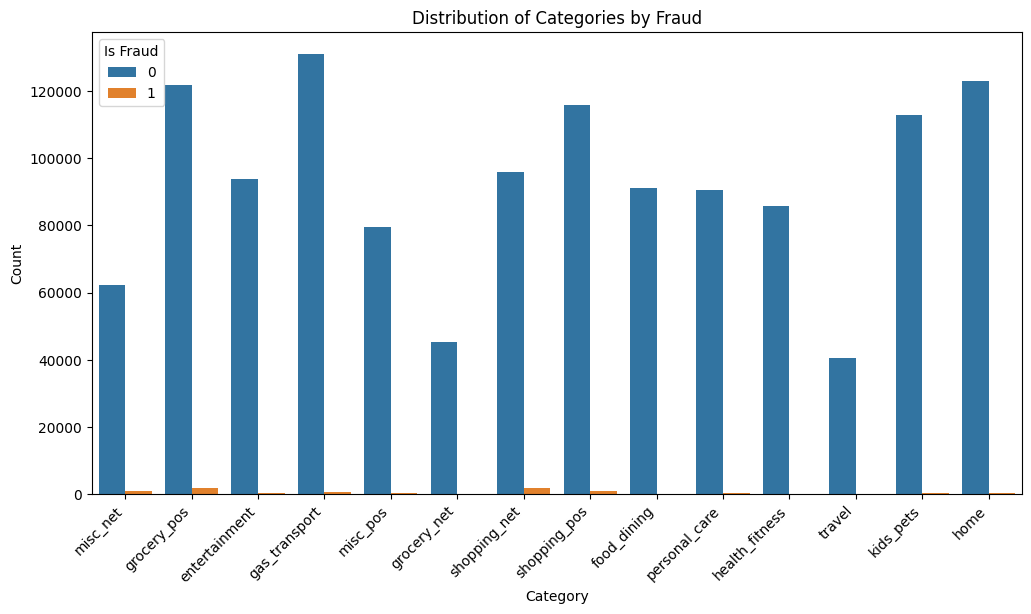

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

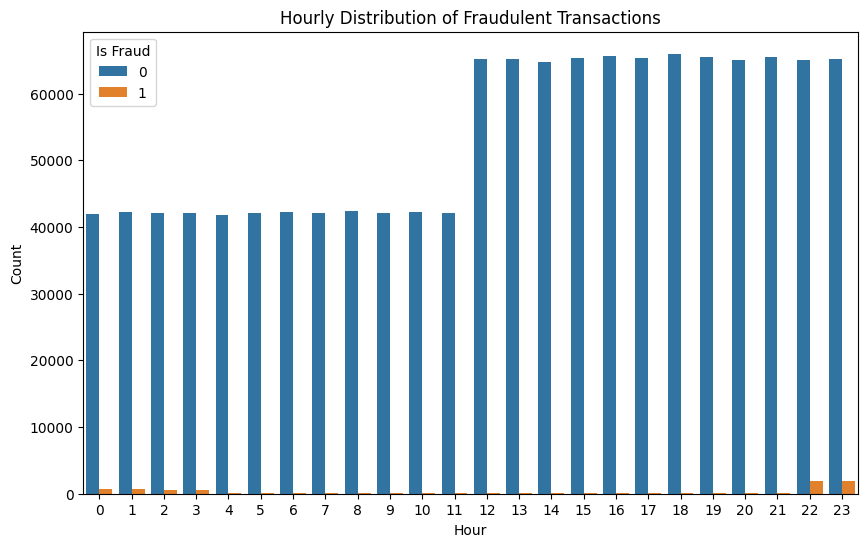

In [ ]:
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['trans_day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_data)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

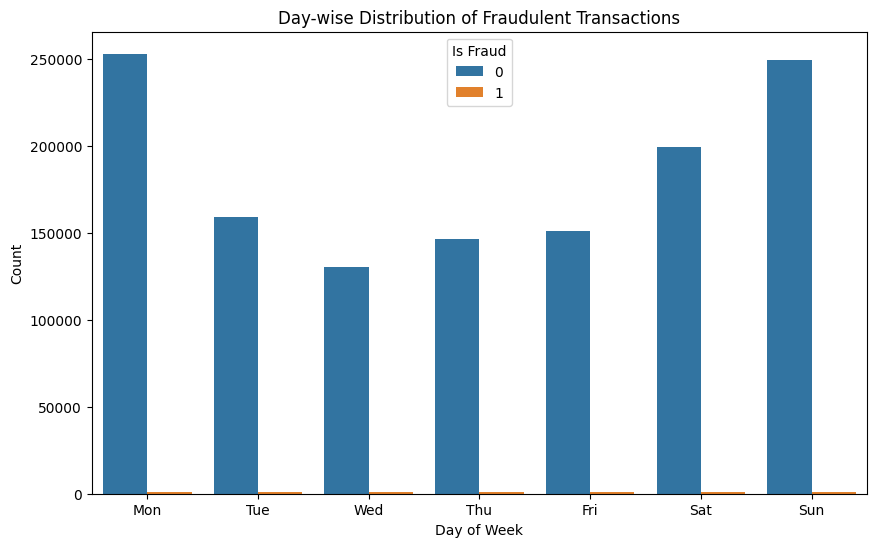

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_data)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

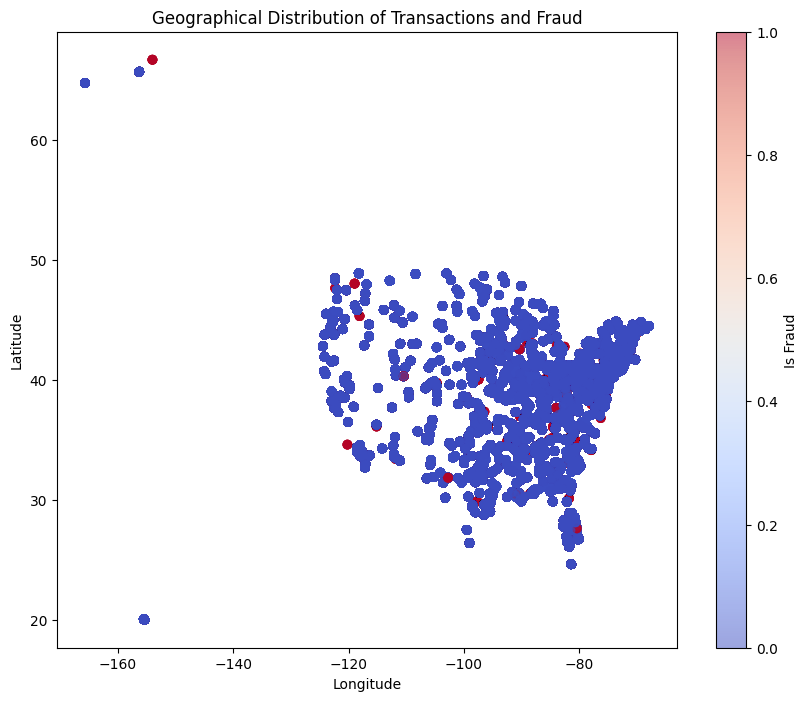

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data['long'], train_data['lat'], c=train_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

<Figure size 1000x600 with 0 Axes>

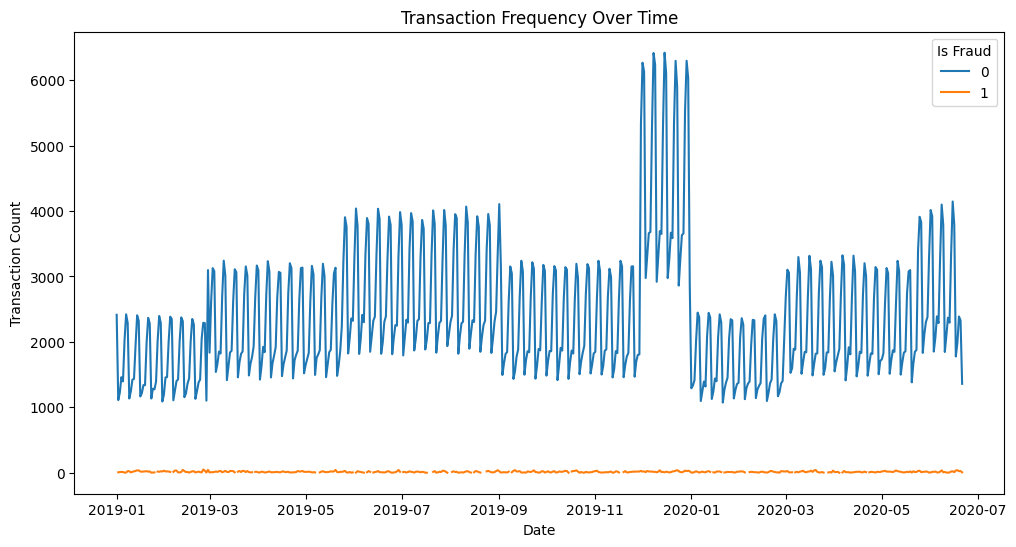

In [ ]:
plt.figure(figsize=(10, 6))
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date'] = train_data['trans_date_trans_time'].dt.date
transaction_counts = train_data.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

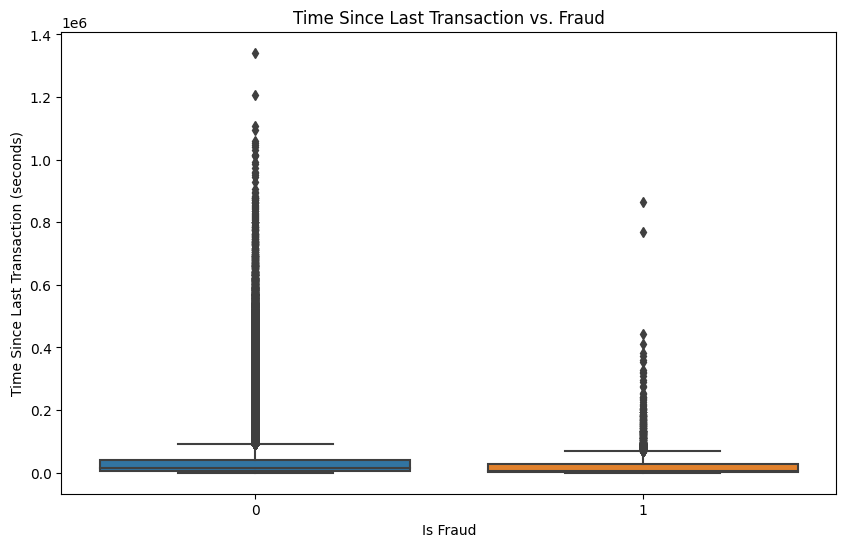

In [ ]:
train_data['time_since_last_transaction'] = train_data.groupby('cc_num')['unix_time'].diff()
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=train_data)
plt.title('Time Since Last Transaction vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Time Since Last Transaction (seconds)')
plt.show()

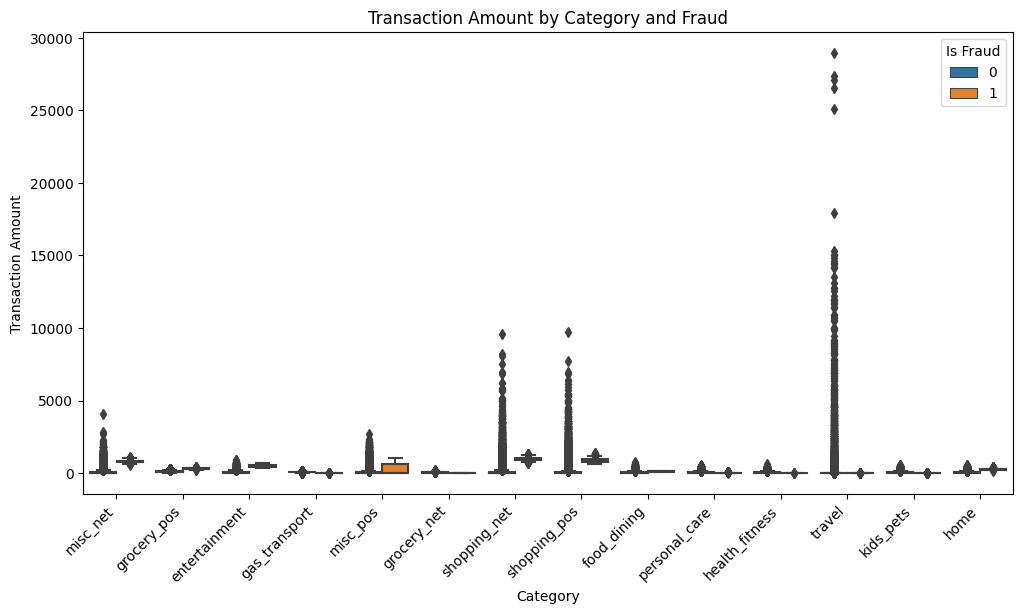

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount by Category and Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

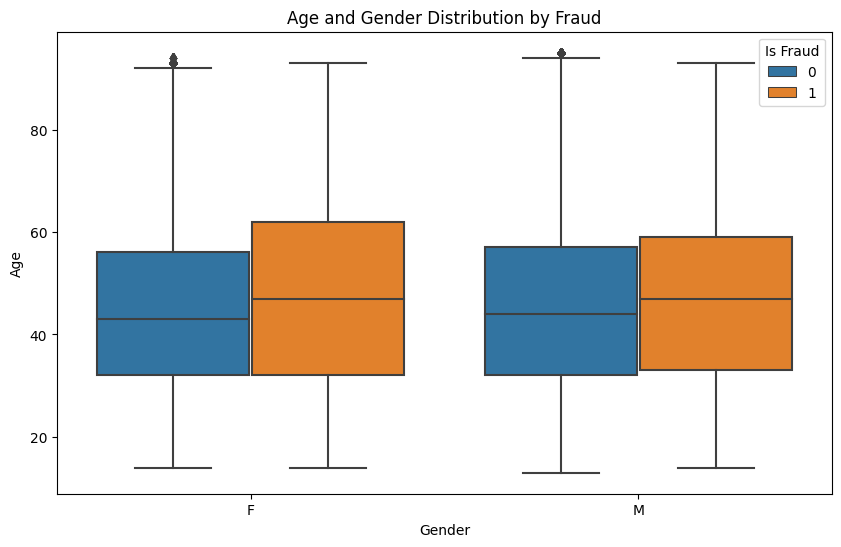

In [ ]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_data)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

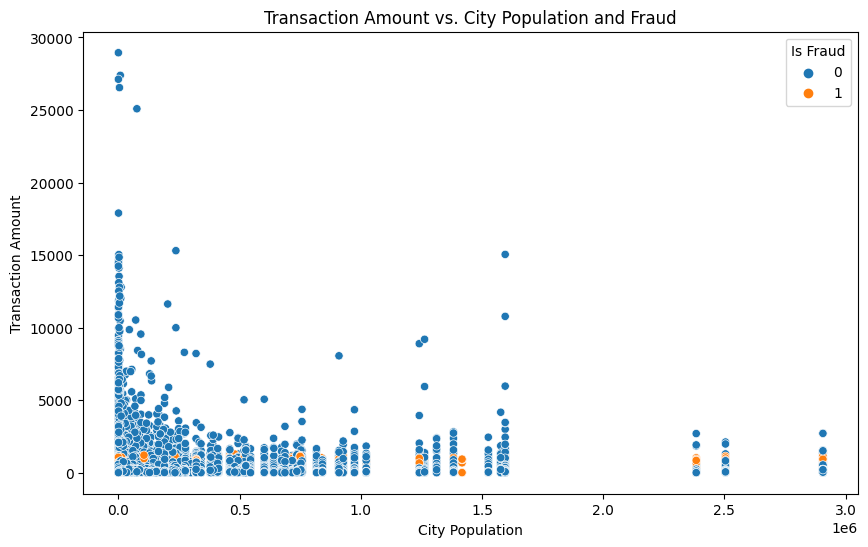

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount vs. City Population and Fraud')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


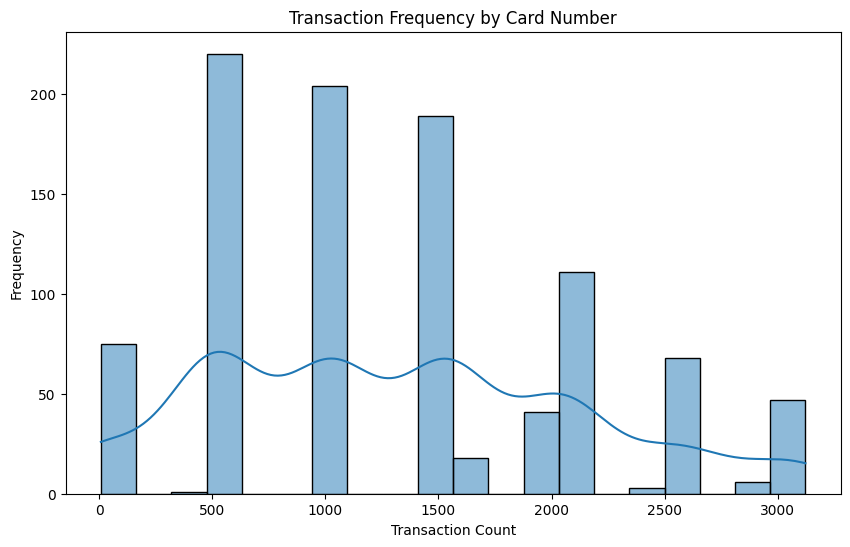

In [ ]:
card_transaction_counts = train_data['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


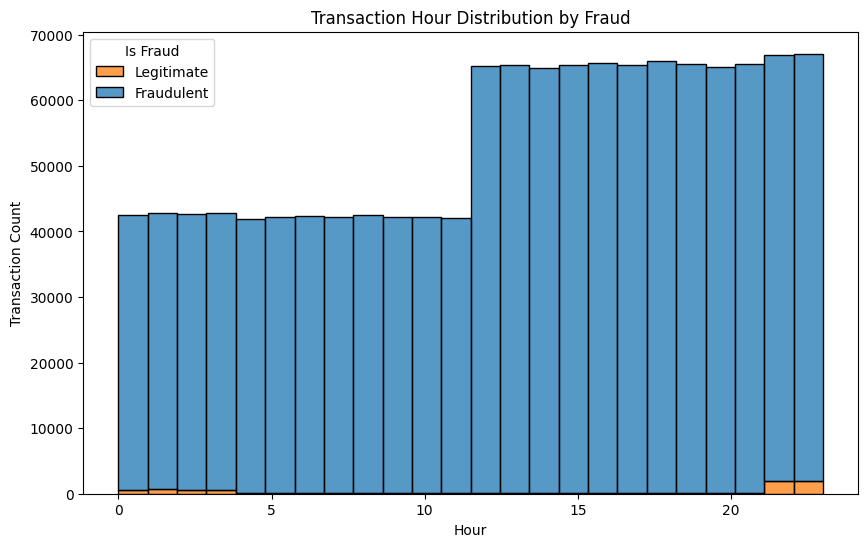

In [ ]:
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

## Model Building 

### Oversampling data to compensate for the high class imbalance in the data using SMOTE

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_data[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_data[categorical_cols]).toarray()

# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_data[numerical_cols])
scaled_test_features = scaler.transform(test_data[numerical_cols])


# Concatenate encoded and scaled features for both train and test data
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

# Define target variables
train_target = train_data['is_fraud']
test_target = test_data['is_fraud']

In [ ]:
smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [ ]:
print('Current length of the training set: ', len(y_train_resample))

Current length of the training set:  2578338


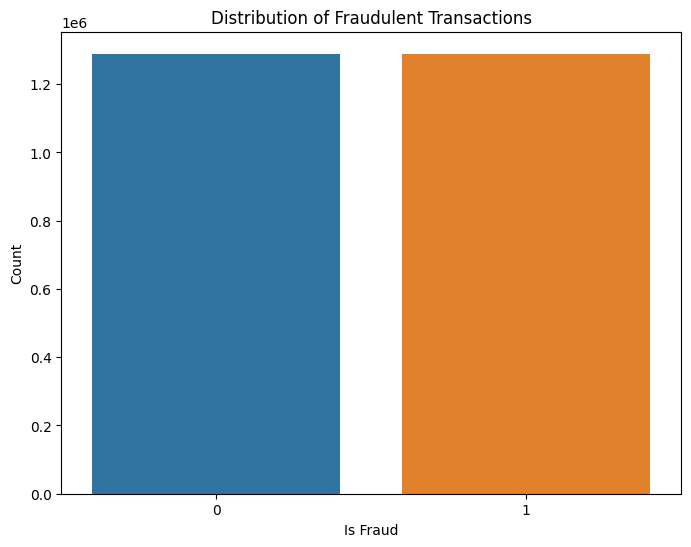

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resample)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [ ]:
x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

lg_predictions = lg_model.predict(x_validation)

lg_accuracy = accuracy_score(y_validation, lg_predictions)

print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 82.945%


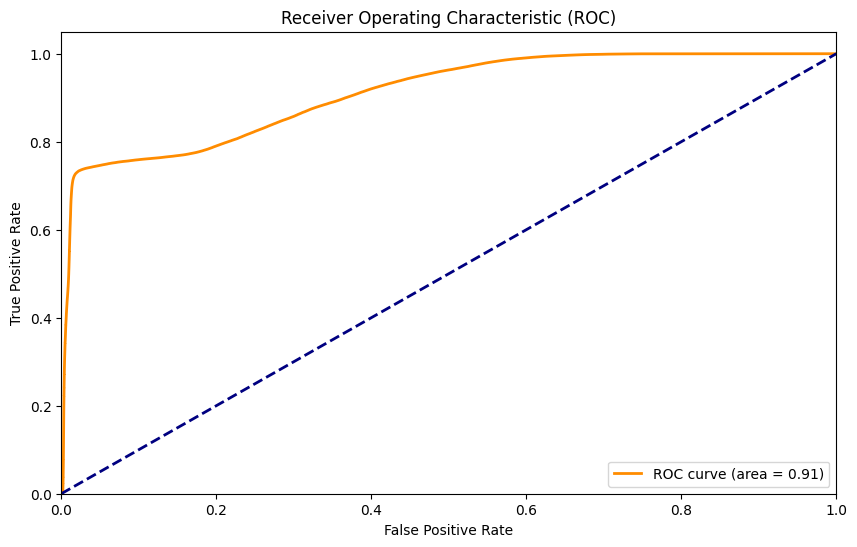

In [ ]:
probs = lg_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

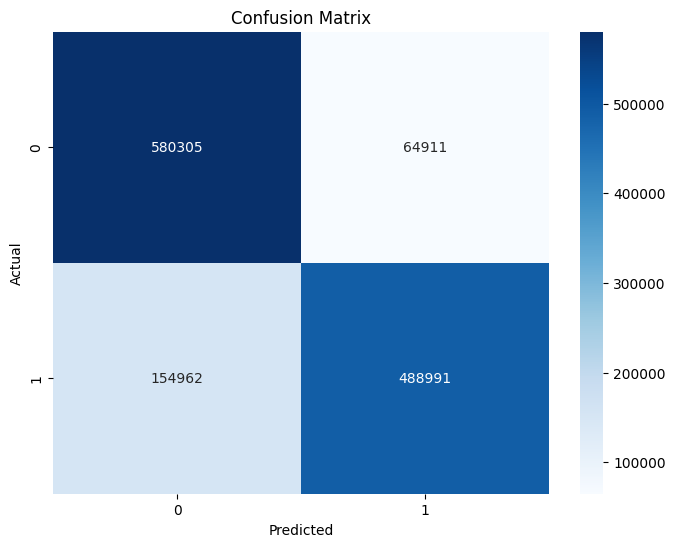

In [ ]:
conf_matrix = confusion_matrix(y_validation, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)

svm_predictions = svm_model.predict(x_validation)

svm_accuracy = accuracy_score(y_validation, svm_predictions)

print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))

SVM Accuracy: 86.078%


### ROC Curve and AUC

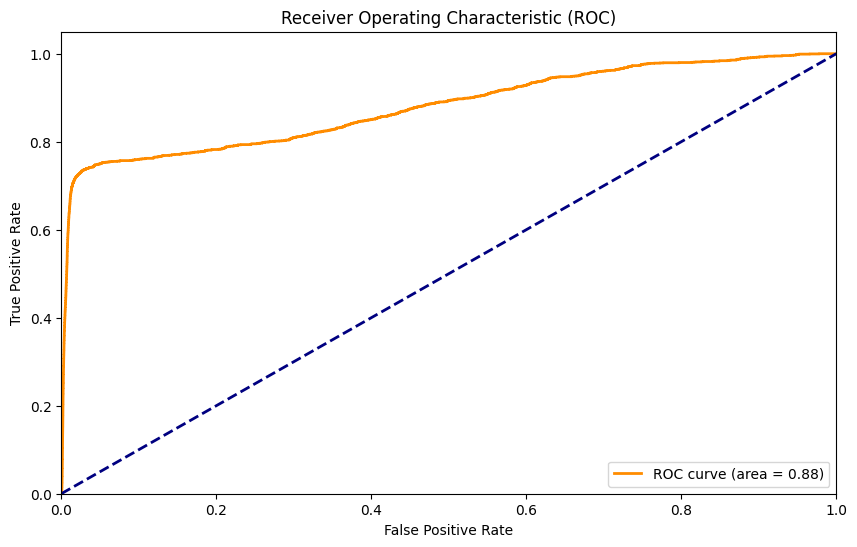

In [ ]:
decision_scores = svm_model.decision_function(final_test_features)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_target, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

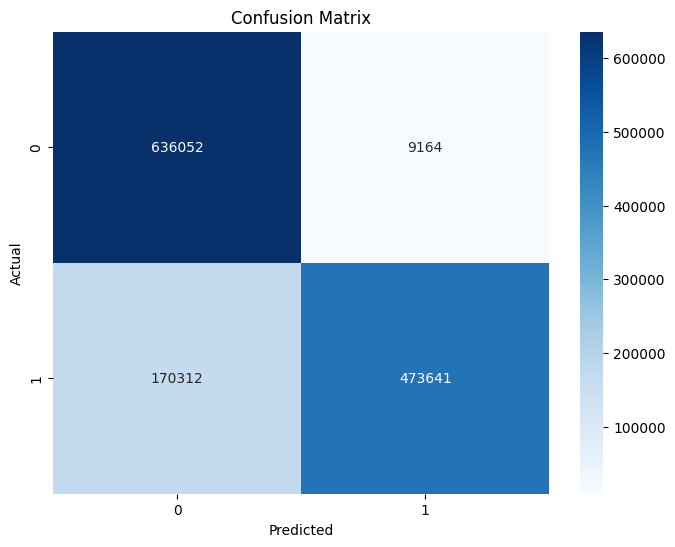

In [ ]:
conf_matrix = confusion_matrix(y_validation, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_validation)

knn_accuracy = accuracy_score(y_validation, knn_predictions)

print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))

KNN Accuracy: 87.765%


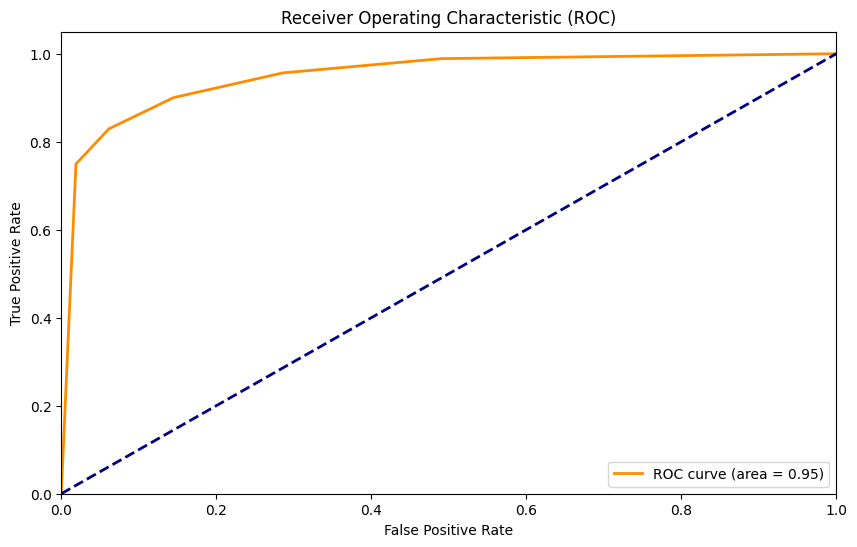

In [ ]:
probs = knn_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

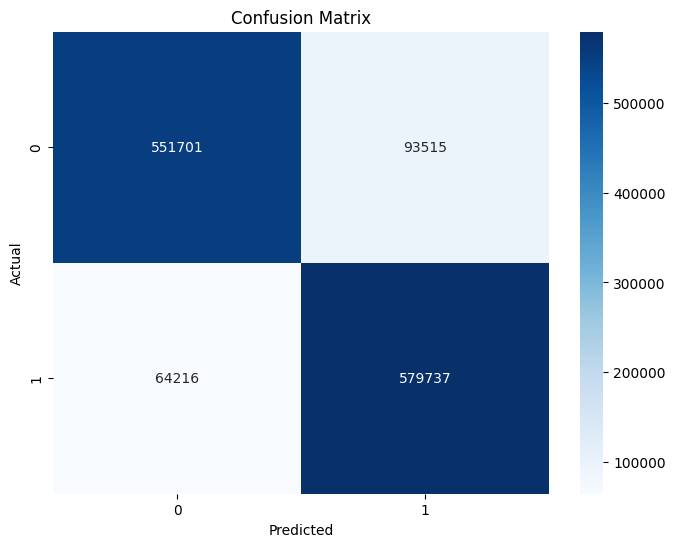

In [ ]:
conf_matrix = confusion_matrix(y_validation, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Building a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_validation)

rf_accuracy = accuracy_score(y_validation, rf_predictions)

print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

Random Forest Accuracy: 97.466%


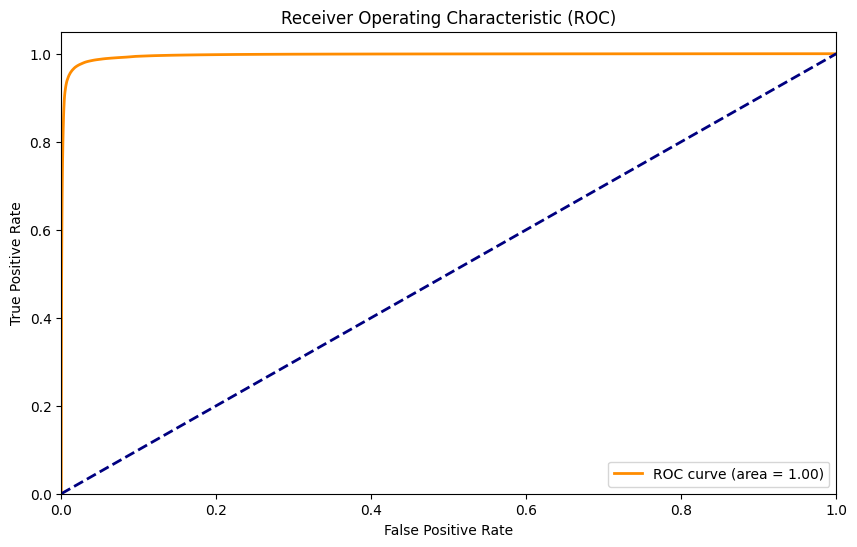

In [ ]:
probs = rf_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

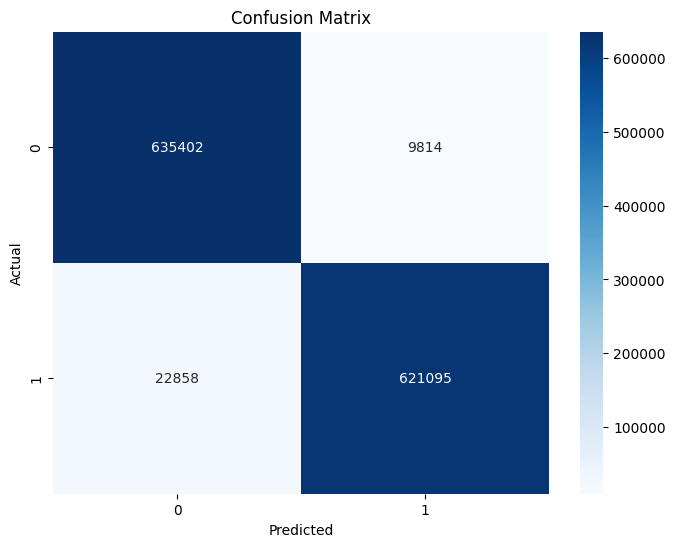

In [ ]:
conf_matrix = confusion_matrix(y_validation, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define model names and instances
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
model_instances = [lg_model, svm_model, knn_model, rf_model]

accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for model in model_instances:
    predictions = model.predict(final_test_features)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})

print(results_df)

                 Model  Accuracy  ROC Score  F1 Score  Precision Score  \
0  Logistic Regression  0.920983   0.828683  0.067053         0.035128   
1                  SVM  0.968121   0.853039  0.151451         0.084397   
2                  KNN  0.841848   0.810788  0.036654         0.018768   
3        Random Forest  0.982964   0.921326  0.280240         0.167424   

   Recall Score  
0      0.735664  
1      0.737063  
2      0.779487  
3      0.859207  


# **Cost-Benefit Analysis**

**Part I: Analyse the dataset and find the following figures:**

In [ ]:
import pandas as pd

# Assuming your train and test datasets are named 'train_data' and 'test_data'
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['month'] = train_data['trans_date_trans_time'].dt.month

average_transactions_per_month_train = train_data['month'].value_counts().mean()

fraudulent_transactions_train = train_data[train_data['is_fraud'] == 1]
average_fraudulent_transactions_per_month_train = fraudulent_transactions_train['month'].value_counts().mean()
average_amount_per_fraudulent_transaction_train = fraudulent_transactions_train['amt'].mean()

print("Train Data:")
print("Average Transactions per Month:", average_transactions_per_month_train)
print("Average Fraudulent Transactions per Month:", average_fraudulent_transactions_per_month_train)
print("Average Amount per Fraudulent Transaction:", average_amount_per_fraudulent_transaction_train)
print()

# Repeat the process for the test dataset
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['month'] = test_data['trans_date_trans_time'].dt.month

average_transactions_per_month_test = test_data['month'].value_counts().mean()

fraudulent_transactions_test = test_data[test_data['is_fraud'] == 1]
average_fraudulent_transactions_per_month_test = fraudulent_transactions_test['month'].value_counts().mean()
average_amount_per_fraudulent_transaction_test = fraudulent_transactions_test['amt'].mean()

print("Test Data:")
print("Average Transactions per Month:", average_transactions_per_month_test)
print("Average Fraudulent Transactions per Month:", average_fraudulent_transactions_per_month_test)
print("Average Amount per Fraudulent Transaction:", average_amount_per_fraudulent_transaction_test)


Train Data:
Average Transactions per Month: 108056.25
Average Fraudulent Transactions per Month: 625.5
Average Amount per Fraudulent Transaction: 531.3200919264589

Test Data:
Average Transactions per Month: 79388.42857142857
Average Fraudulent Transactions per Month: 306.42857142857144
Average Amount per Fraudulent Transaction: 528.3564941724942


**Part II: Compare the cost incurred per month by the bank before and after the model deployment:**

In [ ]:
threshold = 0.5
TP = 0
FN = 0

for index, row in results_df.iterrows():
    model_name = row['Model']
    predictions = model_instances[model_names.index(model_name)].predict(final_test_features)

    adjusted_predictions = (predictions >= threshold).astype(int)

    true_positives = sum((adjusted_predictions == 1) & (test_target == 1))
    false_negatives = sum((adjusted_predictions == 0) & (test_target == 1))

    TP += true_positives
    FN += false_negatives

print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)

True Positives (TP): 6674
False Negatives (FN): 1906


In [ ]:

average_amount_per_fraudulent_transaction_test = 528.3564941724942
average_fraudulent_transactions_per_month_test = 306.42857142857144
average_transactions_per_month_test = 79388.42857142857
cost_before = average_amount_per_fraudulent_transaction_test * average_fraudulent_transactions_per_month_test
TF = 6674
FN = 1906
cost_customer_support = 1.5 * TF
cost_left_undetected = average_amount_per_fraudulent_transaction_test * FN
cost_after = cost_customer_support + cost_left_undetected

savings = cost_after- cost_before

print("Cost before model deployment:", cost_before)
print("Cost after model deployment:", cost_after)
print("Final savings:", savings)


Cost before model deployment: 161903.52571428573
Cost after model deployment: 1017058.4778927739
Final savings: 855154.9521784883


In [ ]:
________________________________________________________ THANK YOU _____________________________________________________________